In [1]:
# first we are going to setup libraries we are using
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif"
# the above imports our libraries

In [3]:
# import numpy
import numpy as np

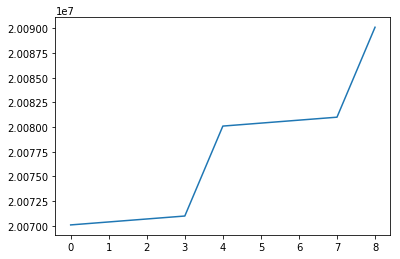

In [6]:
# make time array
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]

plt.plot(time)
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9]



Text(0, 0.5, 'GDP in Billions')

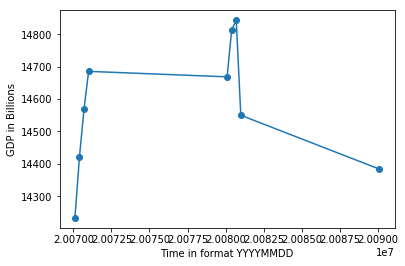

In [8]:
plt.plot(time, gdp, 'o-')
plt.xlabel('Time in format YYYYMMDD')
plt.ylabel('GDP in Billions')

In [9]:
from datetime import datetime
date = []
# for loop and update dates
for t in time:
    date.append( datetime.strptime(str(t), '%Y%m%d') )
    
print(date)

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 4, 1, 0, 0), datetime.datetime(2007, 7, 1, 0, 0), datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 1, 1, 0, 0), datetime.datetime(2008, 4, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0), datetime.datetime(2008, 10, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 0)]


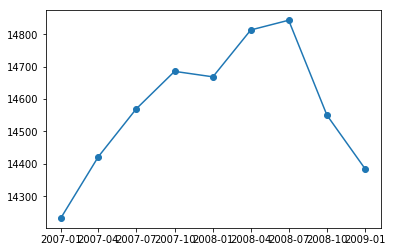

In [10]:
# replot and look
plt.plot(date, gdp, 'o-')

In [12]:
# but lets think about highlighting low and high, i.e. extrema GDP values
# turn things into arrays
gdp = np.array(gdp)
date = np.array(date)

# lets grap low & high times
gdp_high = 14600.00 # arbitrary split
time_high = [(date[gdp >= gdp_high]).min(), (date[gdp >= gdp_high]).max()]
#time_high

gdp_low = 14300.0 # arbitrary
time_low = [(date[gdp <= gdp_low]).min(), (date[gdp <= gdp_low]).max()]
time_low

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


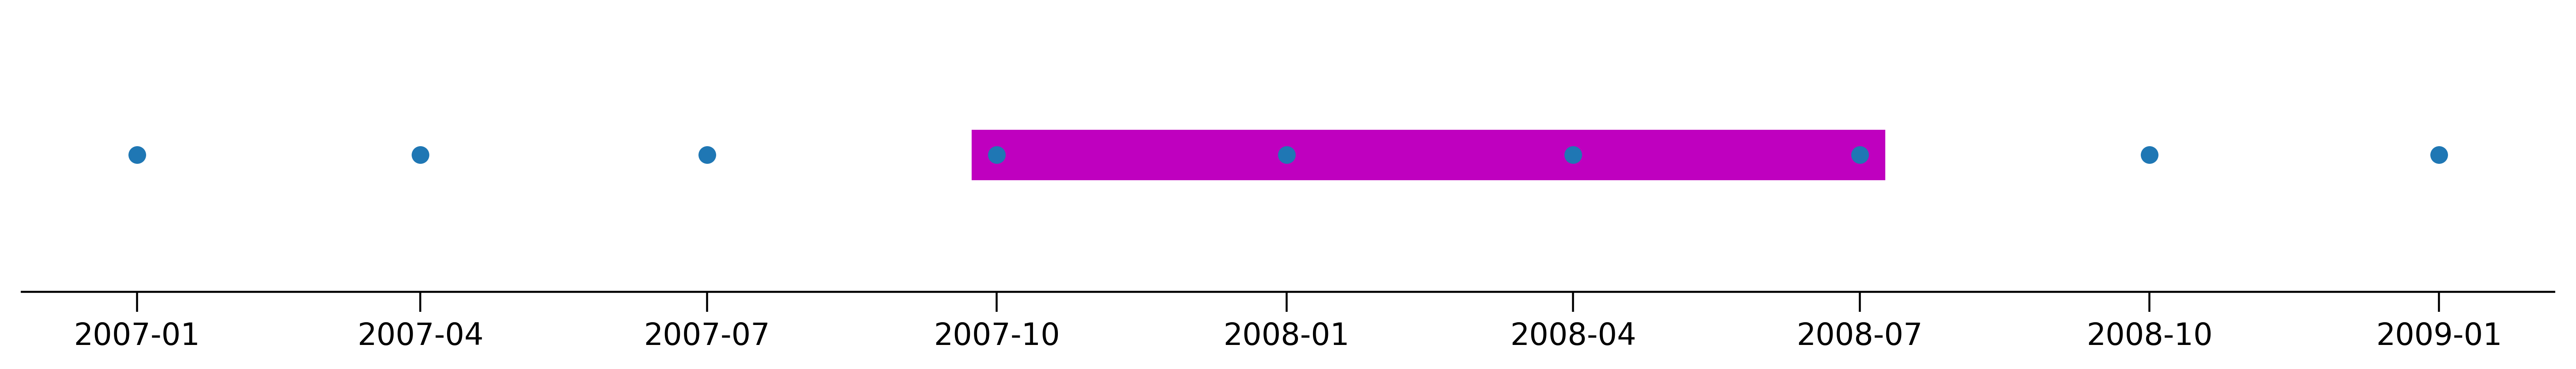

In [24]:
fig, ax = plt.subplots(figsize=(18,2), dpi=400)
ax.plot(date, [1]*len(date), marker = 'o', lw=0)

# lets take off all these axes labels
ax.yaxis.set_visible(False)
# also, take off axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# make axis more readable
ax.xaxis.set_ticks_position('bottom') 
ax.xaxis.set_tick_params(labelsize='large', size=8)

# lets add on regions of low & high GDP
time_lh = [time_low, time_high]
# lets loop and plot in magenta
for t in time_lh:
    print(t)
    ax.plot(t, [1]*len(t), c='m', marker='', ls='-', lw=20, solid_capstyle='projecting', zorder=0)

# lets zoom in our points
ax.set_ylim(0.9,1.1)

plt.show()

In [33]:

def make_plot(capstyle, linecolor='y'):
    fig, ax = plt.subplots(figsize=(18,2), dpi=400)
    ax.plot(date, [1]*len(date), marker = 'o', lw=0)
    # lets take off all these axes labels
    ax.yaxis.set_visible(False)
    # also, take off axes
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # make axis more readable
    ax.xaxis.set_ticks_position('bottom') 
    ax.xaxis.set_tick_params(labelsize='large', size=8)
    # lets add on regions of low & high GDP
    time_lh = [time_low, time_high]
    # lets loop and plot in magenta
    for t in time_lh:
        print(t)
        ax.plot(t, [1]*len(t), c=linecolor, marker='', ls='-', lw=20, solid_capstyle=capstyle, zorder=0)
    # lets zoom in our points
    ax.set_ylim(0.9,1.1)
    plt.show()

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


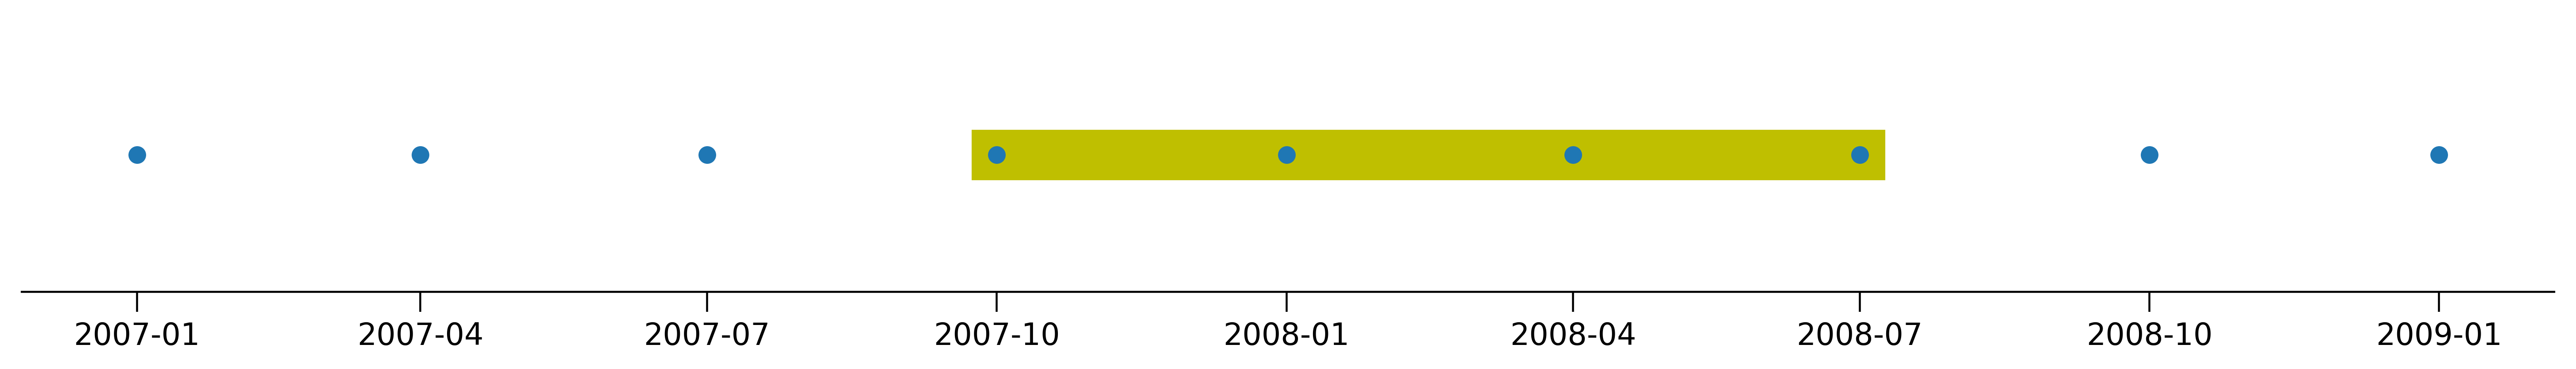

In [34]:
make_plot("projecting")

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


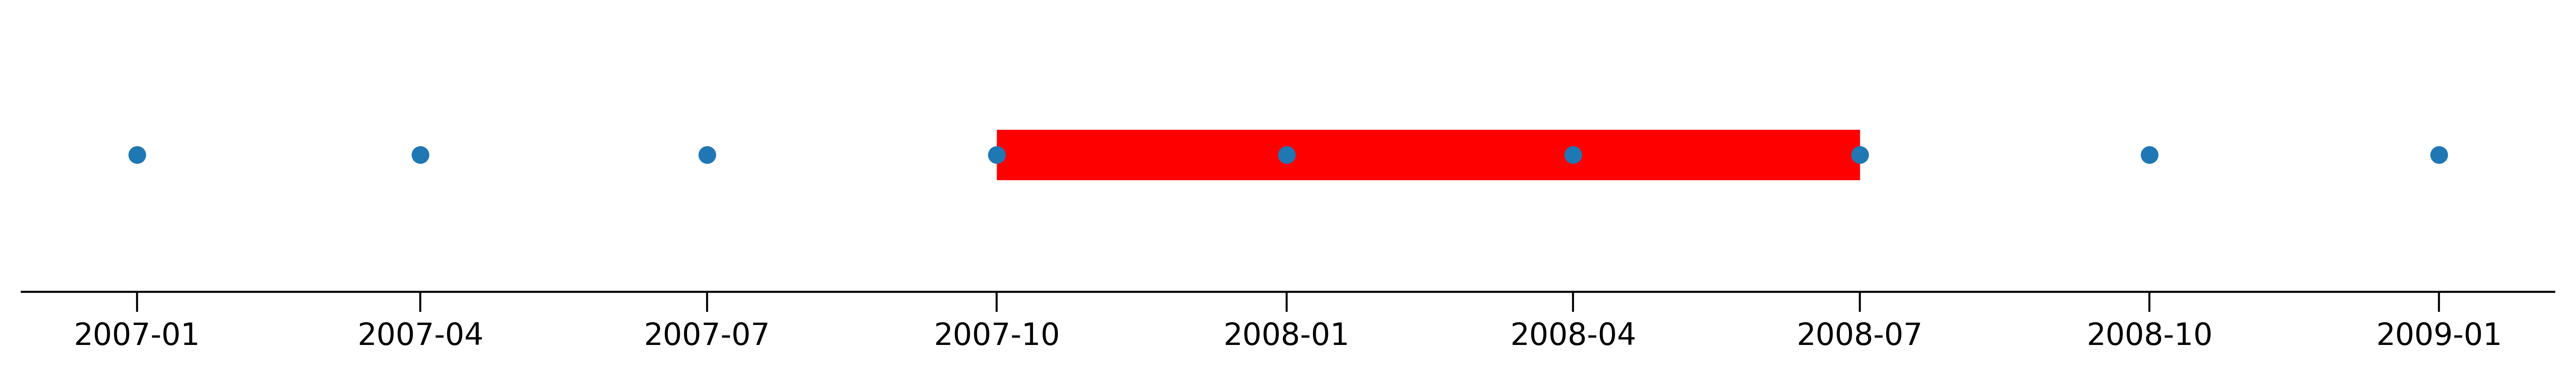

In [35]:
make_plot("butt", linecolor="red")

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


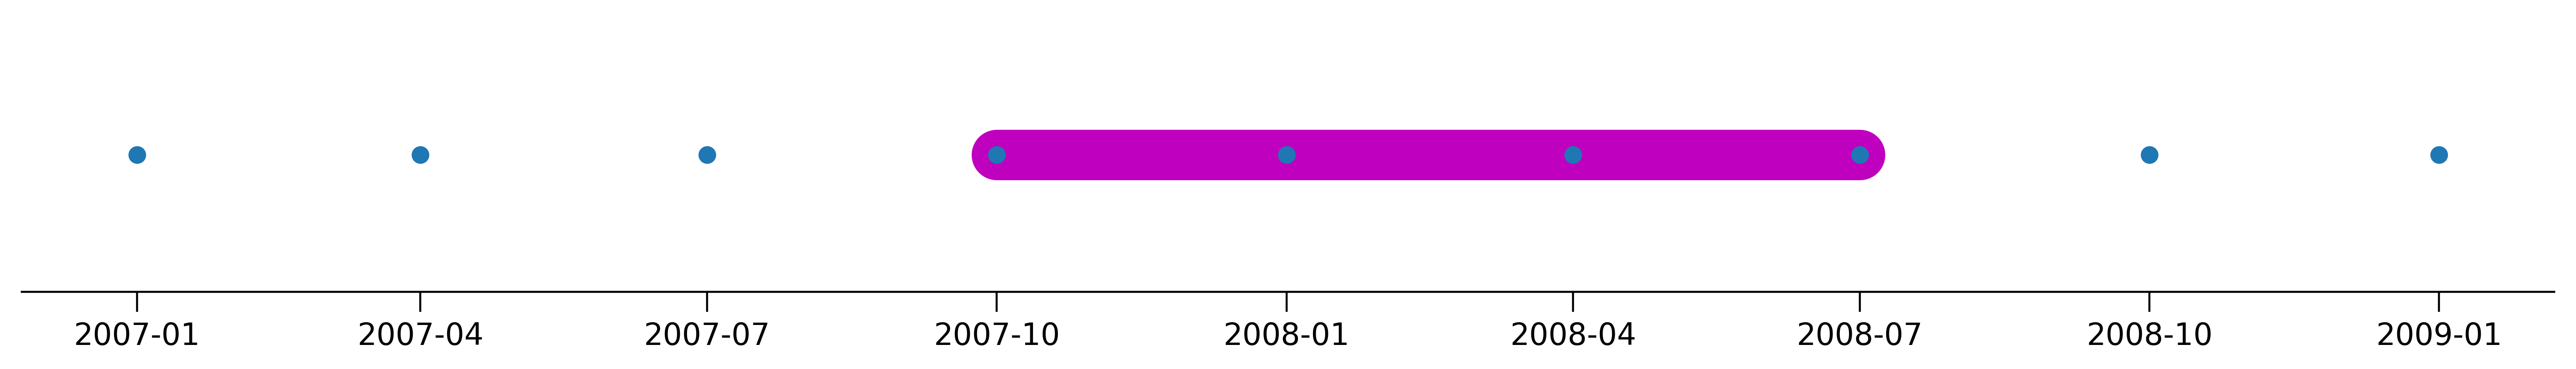

In [32]:
make_plot("round")

## Take aways
* we can express the same dataset in a few ways
* also, small things like line terminations can make a big difference in how accurate our plot is

## Data from a file

* now I'm in mark down, with "Esc" "m" and "Enter"

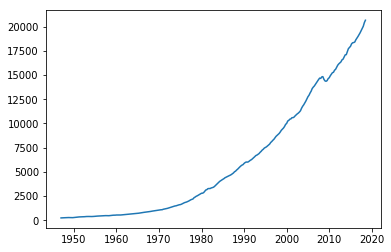

In [37]:
# where my GDP.csv file downloaded
myFredFile = '/Users/jillnaiman1/Downloads/GDP.csv'

# do a little conversion for the data 
def converter(v):
    return datetime.strptime(v.decode("ascii"), '%Y-%m-%d')

myFredType = np.dtype( [("date", datetime), ("gdp", np.float64)] )

data = np.loadtxt(myFredFile, skiprows=1, delimiter=",", converters={0: converter}, dtype=myFredType)

data
plt.plot(data['date'], data['gdp'])

In [38]:
data

array([(datetime.datetime(1947, 1, 1, 0, 0),   243.164),
       (datetime.datetime(1947, 4, 1, 0, 0),   245.968),
       (datetime.datetime(1947, 7, 1, 0, 0),   249.585),
       (datetime.datetime(1947, 10, 1, 0, 0),   259.745),
       (datetime.datetime(1948, 1, 1, 0, 0),   265.742),
       (datetime.datetime(1948, 4, 1, 0, 0),   272.567),
       (datetime.datetime(1948, 7, 1, 0, 0),   279.196),
       (datetime.datetime(1948, 10, 1, 0, 0),   280.366),
       (datetime.datetime(1949, 1, 1, 0, 0),   275.034),
       (datetime.datetime(1949, 4, 1, 0, 0),   271.351),
       (datetime.datetime(1949, 7, 1, 0, 0),   272.889),
       (datetime.datetime(1949, 10, 1, 0, 0),   270.627),
       (datetime.datetime(1950, 1, 1, 0, 0),   280.828),
       (datetime.datetime(1950, 4, 1, 0, 0),   290.383),
       (datetime.datetime(1950, 7, 1, 0, 0),   308.153),
       (datetime.datetime(1950, 10, 1, 0, 0),   319.945),
       (datetime.datetime(1951, 1, 1, 0, 0),   336.   ),
       (datetime.datetime(1

In [39]:
data['date'][240:250]

array([datetime.datetime(2007, 1, 1, 0, 0),
       datetime.datetime(2007, 4, 1, 0, 0),
       datetime.datetime(2007, 7, 1, 0, 0),
       datetime.datetime(2007, 10, 1, 0, 0),
       datetime.datetime(2008, 1, 1, 0, 0),
       datetime.datetime(2008, 4, 1, 0, 0),
       datetime.datetime(2008, 7, 1, 0, 0),
       datetime.datetime(2008, 10, 1, 0, 0),
       datetime.datetime(2009, 1, 1, 0, 0),
       datetime.datetime(2009, 4, 1, 0, 0)], dtype=object)

In [40]:
import sys
print(sys.version)

3.7.1 (default, Nov 28 2018, 11:51:54) 
[Clang 10.0.0 (clang-1000.11.45.5)]
